In [8]:
### run models on GPU
#import os
#import plaidml.keras
#os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

import keras 
import datetime 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.preprocessing import OneHotEncoder

import datetime

from keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Pre-processing

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
# number of examples in a mini-batch
batch_size= 32

# number of classes in the dataset
num_classes= 10

#class_names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

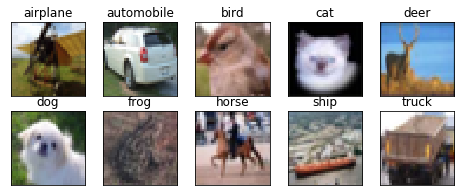

In [5]:
# print figure with 10 random images from each class
fig= plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax=fig.add_subplot(2,5,1+i,xticks=[],yticks=[])
    idx=np.where(y_train[:]==i)[0]
    features_idx=x_train[idx,::]
    img_num=np.random.randint(features_idx.shape[0])
    im=features_idx[img_num,::]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [6]:
new_x_train= x_train/255
new_x_test= x_test/255

x_trainvec= np.reshape(new_x_train,(50000,3072))
x_testvec= np.reshape(new_x_test,(10000,3072))

In [15]:

y_train_ohe=np.eye(num_classes)[y_train]
y_test_ohe=np.eye(num_classes)[y_test]

new_y_train_ohe = np.squeeze(y_train_ohe, axis=1)
new_y_test_ohe = np.squeeze(y_test_ohe, axis=1)
new_y_train_ohe.shape


(10000, 1, 10)


(10000, 10)

# Feed-forward Neural Networks (FFNNs)

In [9]:
model1= Sequential()

model1.add(Dense(3072, activation='relu',input_dim=3072))
model1.add(Dropout(0.5))
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(10,activation='softmax'))

initial_time1= datetime.datetime.now()

model1.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

model1.fit(x_trainvec,new_y_train_ohe, epochs=20,batch_size=32)

score1=model1.evaluate(x_testvec,new_y_test_ohe,batch_size=32)

finishing_time1= datetime.datetime.now()

training_time1= finishing_time1-initial_time1

print('Training:',training_time1)
print('Score:', score1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
50000/50000 [==============================] - 82s 2ms/step - loss: 2.0479 - acc: 0.2400
Epoch 2/20
27616/50000 [===============>..............] - ETA: 37s - loss: 1.8987 - acc: 0.3117

KeyboardInterrupt: 

In [10]:
model2= Sequential()

model2.add(Dense(3072, activation='relu',input_dim=3072))
model2.add(Dropout(0.5))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10,activation='softmax'))


initial_time2= datetime.datetime.now()

model2.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

model2.fit(x_trainvec,new_y_train_ohe, epochs=20,batch_size=32)

datetime.datetime.now()

score2=model2.evaluate(x_testvec,new_y_test_ohe,batch_size=32)

finishing_time2= datetime.datetime.now()

training_time2= finishing_time2-initial_time2

print('Training:',training_time2)
print('Score:', score2)

Epoch 1/20
24416/50000 [=============>................] - ETA: 1:31 - loss: 2.7208 - acc: 0.1023

KeyboardInterrupt: 

In [ ]:
model3= Sequential()

model3.add(Dense(3072, activation='relu',input_dim=3072))
model3.add(Dropout(0.5))
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(10,activation='softmax'))

initial_time3= datetime.datetime.now()

model3.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

model3.fit(x_trainvec,new_y_train_ohe, epochs=20,batch_size=32)

score3=model3.evaluate(x_testvec,new_y_test_ohe,batch_size=32)

finishing_time3= datetime.datetime.now()

training_time3= finishing_time3-initial_time3

print('Training:',training_time3)
print('Score:', score3)

In [10]:
x_testvec.shape
new_y_test_ohe.shape

(10000, 10)

In [ ]:
model4= Sequential()
model4.add(Dense(3072, activation='relu',input_dim=3072))
model4.add(Dropout(0.5))
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(64,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(10,activation='softmax'))

initial_time4= datetime.datetime.now()

model4.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

model4.fit(x_trainvec,new_y_train_ohe, epochs=20,batch_size=64)

score4=model4.evaluate(x_testvec,new_y_test_ohe,batch_size=64)

finishing_time4= datetime.datetime.now()

training_time4= finishing_time4-initial_time4

print('Training:',training_time4)
print('Score:', score4)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
49856/50000 [============================>.] - ETA: 0s - loss: 0.3287 - acc: 0.8995

In [ ]:
model4= Sequential()
model4.add(Dense(3072, activation='relu',input_dim=3072))
model4.add(Dropout(0.5))
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(64,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(10,activation='softmax'))

initial_time4= datetime.datetime.now()

model4.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

model4.fit(x_trainvec,new_y_train_ohe, epochs=20,batch_size=64)

score4=model4.evaluate(x_testvec,new_y_test_ohe,batch_size=64)

finishing_time4= datetime.datetime.now()

training_time4= finishing_time4-initial_time4

print('Training:',training_time4)
print('Score:', score4)

# Convolutional Neural Networks (CNNs)